# Test feature extraction

In [430]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph
import numpy as np
import random
import json
import seaborn as sns
import os

%matplotlib inline  

In [431]:
# import AnomalousCommunityDetector and AnomalyInfusedCommunityStructuredRandomNetworkGenerator from parent directory
original_cur_dir = os.getcwd()
os.chdir('..')
from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from AnomalousCommunityDetection.archive.Utils.GraphCommunityColorer import GraphCommunityColorer
os.chdir(original_cur_dir)

In [30]:
G = barabasi_albert_graph(10, 8)

In [31]:
def ba_graph_vis(n, max_m):
    
    fig, axes = plt.subplots(ncols=4, nrows=max_m, figsize=(17, 20))
    for m in range(max_m):
        for r in range(4):
            
            g = barabasi_albert_graph(n, m + 1, seed=r)
            
            ax_row = ((m * 4) + r) // 4
            ax_col = ((m * 4) + r) % 4
            
            #axes[ax_row][ax_col].set_xlabel(f'what! {m+1}',rotation=0, size='large')           
            nx.draw(g, ax=axes[ax_row][ax_col], with_labels=True)
            


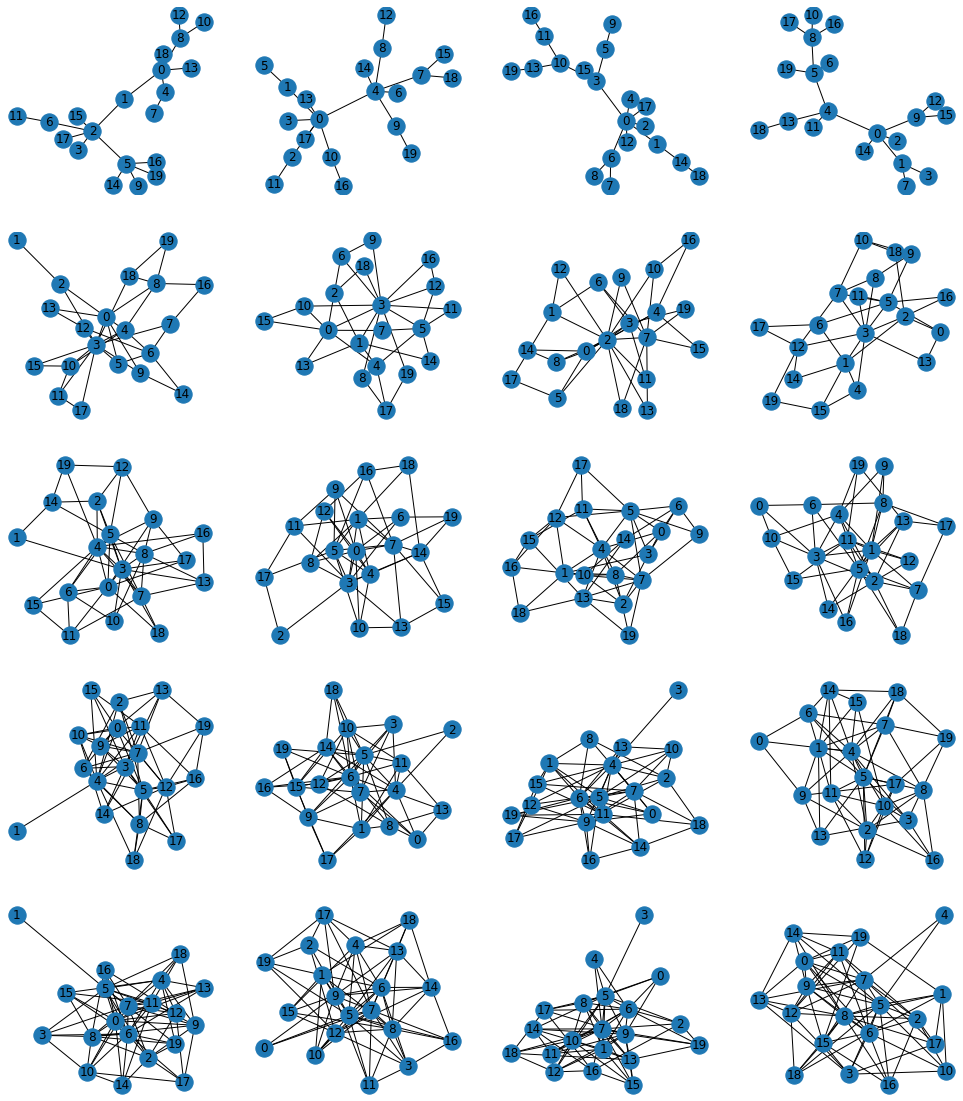

In [32]:
ba_graph_vis(20, 5)

In [33]:
def er_graph_vis(n, ps):
    
    fig, axes = plt.subplots(ncols=4, nrows=len(ps), figsize=(17, 20))
    for row, p in enumerate(ps):
        for r in range(4):
            
            g = erdos_renyi_graph(n, p, seed=r)
            
            ax_row = ((row * 4) + r) // 4
            ax_col = ((row * 4) + r) % 4
            
            #axes[ax_row][ax_col].set_xlabel(f'what! {m+1}',rotation=0, size='large')           
            nx.draw(g, ax=axes[ax_row][ax_col], with_labels=True)
            


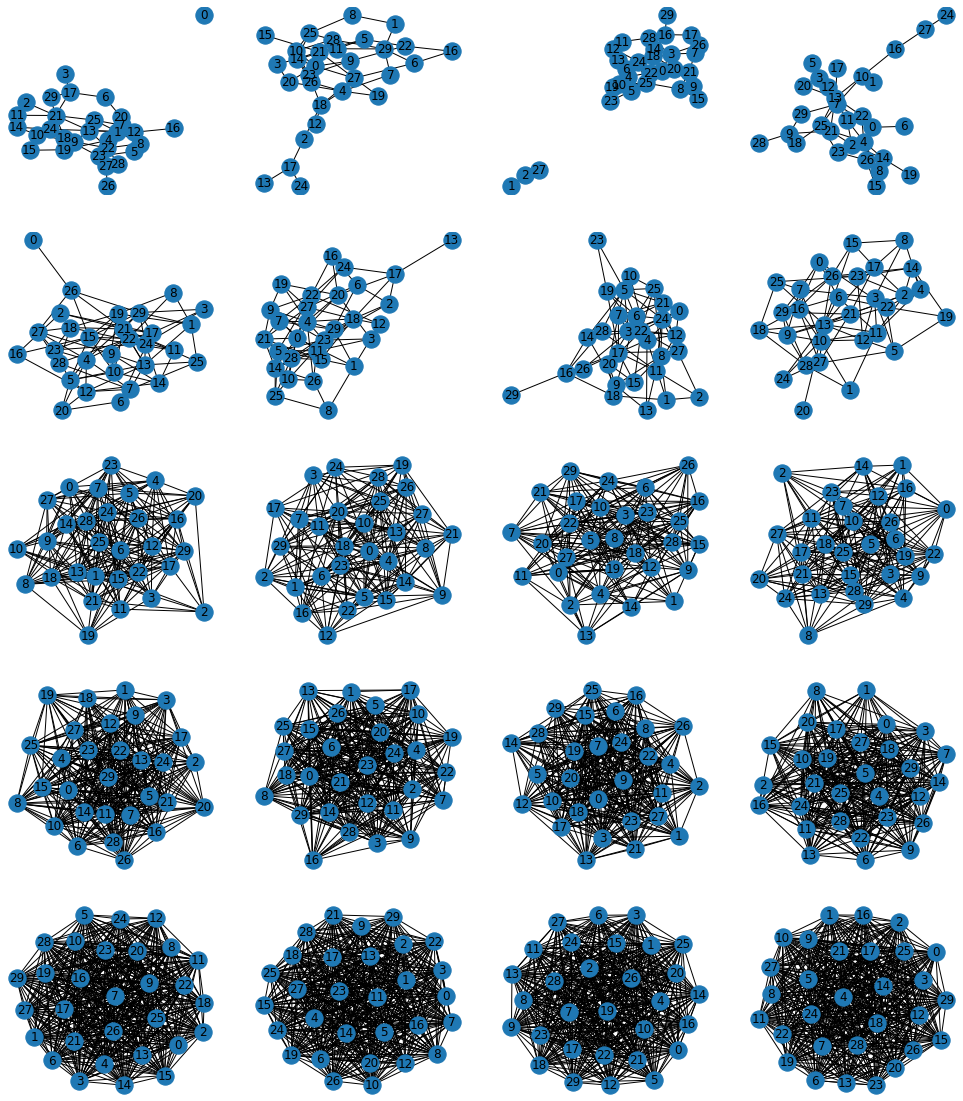

In [34]:
er_graph_vis(30, [0.1, 0.2, 0.5, 0.8, 1])

In [ ]:
n = 30
p = 0.1
deg_means = []
lone_nodes = []
for r in range(1000):
    g = erdos_renyi_graph(n=n, p=p)
    _, degs = zip(*g.degree())
    lone_nodes.append(list(degs).count(0))
    deg_means.append(np.mean(degs))
lone_nodes = [l for l in lone_nodes if l!=0]

In [ ]:
#_, degs = zip(*g.degree())
print(f'Expected average degree: {np.round((n-1)*p, 3)}; Actual average mean degree: {np.round(np.mean(deg_means), 3)}')

In [ ]:
sns.histplot(lone_nodes)


In [ ]:
nx.draw(g)

In [416]:
norm_comm_alg = barabasi_albert_graph
anom_comm_alg = erdos_renyi_graph
k_min = 1
k_max = 1
random_seed=1

In [246]:
def shit(comm_sizes: list, min_comm_size: int = 30, max_comm_size: int = 1500, min_inter_edges: int= 3, max_inter_edges: int=50):
    max_inter_p = min_inter_edges / min_comm_size  # Bigger
    min_inter_p = max_inter_edges / max_comm_size  # Smaller
    
    
    m = (min_inter_p - max_inter_p) / (max_comm_size - min_comm_size)  # Slope
    b = max_inter_p - m * (min_comm_size)  # Intercept
    
    print(f'min_inter_edges: {min_inter_edges:.3f}, max_inter_edges: {max_inter_edges:.3f}')
    print(f'max_inter_p: {max_inter_p:.3f}, min_inter_p: {min_inter_p:.3f}')
    print(f'slope: {m:.6f}, intercept: {b:.6f}')
    
    if type(comm_sizes) != np.ndarray:
        comm_sizes_arr = np.array(comm_sizes) 
    else:
        comm_sizes_arr = comm_sizes
        
    vector_of_inter_ps = comm_sizes_arr * m + b

    return comm_sizes_arr * vector_of_inter_ps
    
    

In [ ]:
def shit(comm_sizes: list, min_comm_size: int = 30, between_comm_size: int = 500, max_comm_size: int = 1500, min_inter_edges: int= 3, max_inter_edges: int=50):
    max_inter_p = min_inter_edges / min_comm_size  # Bigger
    min_inter_p = max_inter_edges / max_comm_size  # Smaller
    
    
    m = (min_inter_p - max_inter_p) / (max_comm_size - min_comm_size)  # Slope
    b = max_inter_p - m * (min_comm_size)  # Intercept
    
    print(f'min_inter_edges: {min_inter_edges:.3f}, max_inter_edges: {max_inter_edges:.3f}')
    print(f'max_inter_p: {max_inter_p:.3f}, min_inter_p: {min_inter_p:.3f}')
    print(f'slope: {m:.6f}, intercept: {b:.6f}')
    
    if type(comm_sizes) != np.ndarray:
        comm_sizes_arr = np.array(comm_sizes) 
    else:
        comm_sizes_arr = comm_sizes
        
    vector_of_inter_ps = comm_sizes_arr * m + b

    return comm_sizes_arr * vector_of_inter_ps
    
    

In [402]:
def _dermine_coefs(min_comm_size: int = 30, between_comm_size: int= 500, max_comm_size: int = 1500, min_inter_edges: int= 3, between_inter_edges:int=25, max_inter_edges: int=75, deg: int = 2):
    # Return a polynomaial function calculated from gicen points
    coefs = np.polyfit(
        [min_comm_size, between_comm_size, max_comm_size],
        [min_inter_edges, between_inter_edges, max_inter_edges],
        deg
    )
    return np.poly1d(coefs)

In [403]:
f = _dermine_coefs()

In [404]:
f(X)

array([ 3.        ,  3.22899479,  3.45809813,  3.68731003,  3.91663048,
        4.14605949,  4.37559705,  4.60524316,  4.83499783,  5.06486105,
        5.29483283,  5.52491316,  5.75510204,  5.98539948,  6.21580547,
        6.44632002,  6.67694312,  6.90767477,  7.13851498,  7.36946374,
        7.60052106,  7.83168693,  8.06296135,  8.29434433,  8.52583587,
        8.75743595,  8.98914459,  9.22096179,  9.45288754,  9.68492184,
        9.9170647 , 10.14931611, 10.38167607, 10.61414459, 10.84672167,
       11.07940729, 11.31220148, 11.54510421, 11.7781155 , 12.01123535,
       12.24446374, 12.47780069, 12.7112462 , 12.94480026, 13.17846287,
       13.41223404, 13.64611376, 13.88010204, 14.11419887, 14.34840426,
       14.58271819, 14.81714069, 15.05167173, 15.28631133, 15.52105949,
       15.7559162 , 15.99088146, 16.22595528, 16.46113765, 16.69642857,
       16.93182805, 17.16733608, 17.40295267, 17.63867781, 17.87451151,
       18.11045376, 18.34650456, 18.58266392, 18.81893183, 19.05

In [405]:
X = np.arange(30, 1505, 5)

In [406]:
coefs = np.polyfit([30, 500,1500], [3, 25, 75], 2)

In [407]:
#coefs = np.polyfit([30, 500,1500], [0.1, 0.04, 0.03333], 5)
fft = np.poly1d(coefs)

In [413]:
i = 1
X[i], fft(X)[i]
X[i], f(X)[i]

(35, 3.2289947894051183)

In [374]:
coefs, fft

(array([-2.97438124e-05,  9.44876248e-02,  1.92140686e-01]),
 poly1d([-2.97438124e-05,  9.44876248e-02,  1.92140686e-01]))

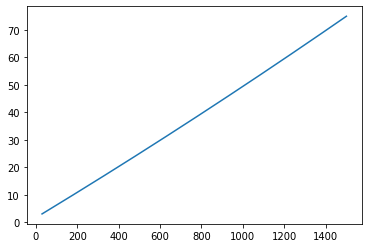

In [400]:
plt.plot(X, f(X))

In [257]:
comm_sizes = np.arange(30, 1510, 10)
comm_sizes[20]

230

In [251]:
edge = shit(comm_sizes, max_inter_edges=75)

min_inter_edges: 3.000, max_inter_edges: 75.000
max_inter_p: 0.100, min_inter_p: 0.050
slope: -0.000034, intercept: 0.101020


In [258]:
edge[20]

21.435374149659864

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

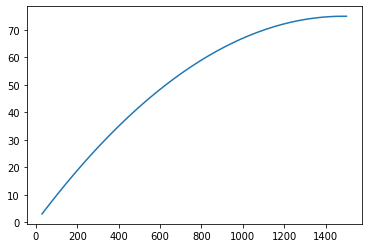

In [253]:
plt.plot(comm_sizes, edge)

In [255]:
edge.max()

75.00680272108845

In [62]:
s = Scaler()
s.fit([1,2,3,4], 0.1, 0.0333)

In [66]:
s.transform([1.5])

array([0.08888333])

In [38]:
shit(12)

0.1 0.03333333333333333


In [36]:
50/1500

0.03333333333333333

In [35]:
1500*0.066

99.0

In [509]:
norm_comm_sizes = [30]*5
norm_m = 1
norm_inter_p = 0.075

anom_comm_sizes = [30]*1
anom_m = 0.5
anom_inter_p = 0.3

In [510]:
gen = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(norm_comm_alg, anom_comm_alg,k_min, k_max)

In [511]:
G = gen.generate_network(norm_comm_sizes, norm_m, norm_inter_p, anom_comm_sizes,anom_m, anom_inter_p)

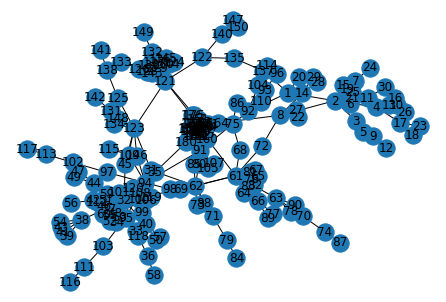

In [512]:
nx.draw(G, with_labels=True)

Num. nodes: 30, Num. edges: 213
Avg. degree: 14.2


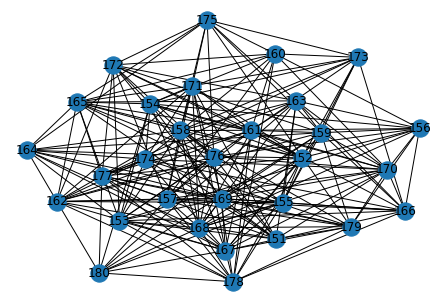

In [513]:
sub_G = nx.subgraph(G, [int(n) for n in gen.get_partitions()['comm06']])
print(f'Num. nodes: {len(sub_G)}, Num. edges: {len(sub_G.edges())}')
print(f'Avg. degree: {np.mean(list(dict(sub_G.degree()).values())):.1f}')
nx.draw(sub_G, with_labels=True)

In [514]:
30*29/2 *0.5

217.5

2.1052631578947367

In [454]:
nx.degree(sub_G).

DegreeView({1: 4, 2: 14, 3: 1, 4: 1, 5: 2, 6: 5, 7: 5, 8: 2, 9: 1, 10: 1, 11: 2, 12: 6, 13: 2, 14: 1, 15: 1, 16: 2, 17: 1, 18: 2, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 164: 3, 37: 1, 167: 3, 43: 1, 179: 3, 95: 1, 116: 1, 125: 1})

In [427]:
gen._partitions

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30},
 {31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60},
 {61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90},
 {91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120},
 {121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150},
 {151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [429]:
gen.get_partitions()

{'comm01': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '171',
  '109'],
 'comm02': ['31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60'],
 'comm03': ['4',
  '161',
  '172',
  '180',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90'],
 'comm04': ['132',
  '138',
  '159',
  '72',
  '85',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108'

In [428]:
colorer = GraphCommunityColorer(G, list(gen.get_partitions().items()), list(gen.get_partitions()))
colorer.color_node_original_community_attributes()

TypeError: unhashable type: 'list'

In [ ]:
G.nodes(data=True)